In [1]:
import importlib
from sympy import init_printing
import symbolic_evolution
import symbolic_fisher


In [2]:
importlib.reload(symbolic_fisher)


<module 'symbolic_fisher' from 'C:\\Projects\\Crosstalk\\Symbolic\\symbolic_fisher.py'>

In [16]:
from Symbolic.symbolic_evolution import expectation_value
from symbolic_evolution import zero_state, evolve_state, H, get_expectation_values_exp, apply_operator, Ry
from sympy import init_printing
import numpy as np
init_printing(use_latex='mathjax', pretty_print=True, wrap_line=True)

n = 2
state = zero_state(n)
state = apply_operator(state, Ry(np.linspace(0.25 * np.pi, 1.75 * np.pi, n)))

# state = apply_operator(state, H(n))
state = evolve_state(state)
value = expectation_value(state, "XI")
value

                                                                    -a₀⋅t
(0.603553390593274⋅cos(t⋅ω₀) + 0.103553390593274⋅cos(t⋅(j₀ + ω₀)))⋅ℯ     

In [21]:
print(functions)

[(cos(t*ω0) + cos(t*(j0 + ω0)))*exp(-a0*t)/2, (cos(t*ω1) + cos(t*(j0 + ω1)) + cos(t*(j1 + ω1)) + cos(t*(j0 + j1 + ω1)))*exp(-a1*t)/4, (cos(t*ω2) + cos(t*(j1 + ω2)))*exp(-a2*t)/2, -(sin(t*ω0) + sin(t*(j0 + ω0)))*exp(-a0*t)/2, -(sin(t*ω1) + sin(t*(j0 + ω1)) + sin(t*(j1 + ω1)) + sin(t*(j0 + j1 + ω1)))*exp(-a1*t)/4, -(sin(t*ω2) + sin(t*(j1 + ω2)))*exp(-a2*t)/2]


In [2]:
from Symbolic.symbolic_fisher import gaussian_fisher_matrix
n = 3
init_printing(use_latex='mathjax', pretty_print=True, wrap_line=True)
function = symbolic_evolution.get_expectation_values_exp(n, 0)[0]
function = symbolic_evolution.set_parameters(function, J=[0]*n)
matrix = gaussian_fisher_matrix(function, 3)
matrix

[ω0, a0, t]


⎡      3                                  3                                  ⎤
⎢     ___                                ___                                 ⎥
⎢     ╲                                  ╲                                   ⎥
⎢      ╲    2  -2⋅a₀⋅t    2               ╲    2  -2⋅a₀⋅t                    ⎥
⎢      ╱   t ⋅ℯ       ⋅sin (t⋅ω₀)         ╱   t ⋅ℯ       ⋅sin(t⋅ω₀)⋅cos(t⋅ω₀)⎥
⎢     ╱                                  ╱                                   ⎥
⎢     ‾‾‾                                ‾‾‾                                 ⎥
⎢    t = 0                              t = 0                                ⎥
⎢                                                                            ⎥
⎢  3                                          3                              ⎥
⎢ ___                                        ___                             ⎥
⎢ ╲                                          ╲                               ⎥
⎢  ╲    2  -2⋅a₀⋅t                            ╲    2

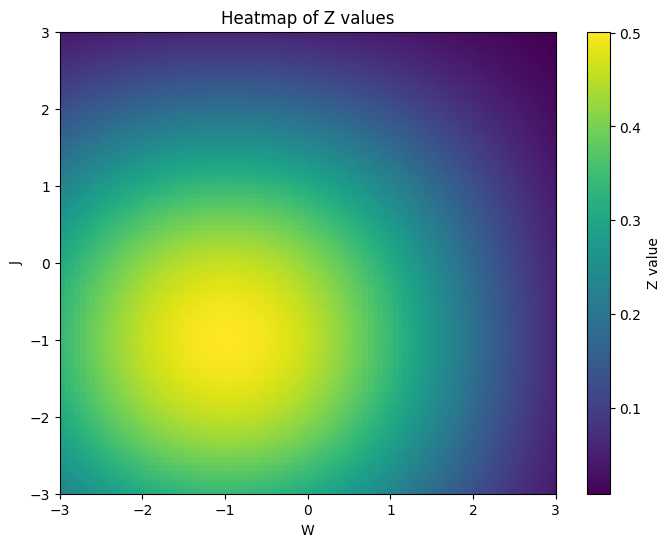

In [21]:
from matplotlib import pyplot as plt
import numpy as np
from sympy import lambdify, symbols

t = symbols('t', real=True)
w = symbols(f'ω0:{n}', real=True)
j = symbols(f'j0:{n - 1}', real=True)
a = symbols(f'a0:{n}', real=True)
symbolic_exp = [lambdify([t, *w, *a, *j], expr, 'numpy') for expr in functions[0:3]]
W0s = np.linspace(-3, 3, 100)
W1s = np.linspace(-3, 3, 100)
Js = np.linspace(-3, 3, 100)

z = []
for W0 in W0s:
    for W1 in W1s:
        z.append([W0,W1, np.prod([np.array(exp(0.3, W0, W1, 0.5, 0.5, 2)) for exp in symbolic_exp])])
z = np.array(z)
Z = z[:, 2].reshape(len(W0s), len(W1s))

# Creating the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(Z, extent=[W0s.min(), W1s.max(), Js.min(), Js.max()], origin='lower', aspect='auto')
plt.colorbar(label='Z value')
plt.xlabel('W')
plt.ylabel('J')
plt.title('Heatmap of Z values')
plt.show()